<a href="https://colab.research.google.com/github/Yuyu817/DNN-hw/blob/machine-learning/DNN_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

安裝匯入各種套件

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D

檢查是否使用 GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

想進一步知道用了什麼 GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3e744ede-af6b-52a5-1e9d-3c79182c1ccf)


讀入CIFAR-10 數據集
 ( CIFAR-10 數據集是用於機器視覺領域的圖像分類數據集，它有飛機、汽車、鳥類、貓、鹿、狗、青蛙、馬、船和卡車共計10個類別的60000 張彩色圖像，尺寸均為32x32，其包 含5 個訓練集和1 個測試集，每個數據集有10000 張圖像。)

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

查看數據維度

In [ ]:
print("訓練圖像维度:", x_train.shape)
print("測試圖像维度:", x_test.shape)
print("訓練標籤维度:", y_train.shape)
print("測試標籤维度:", y_test.shape)

訓練圖像维度: (50000, 32, 32, 3)
測試圖像维度: (10000, 32, 32, 3)
訓練標籤维度: (50000, 1)
測試標籤维度: (10000, 1)


資料整理

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

打造神經網路

In [ ]:
model = Sequential()

In [ ]:
model= Sequential()
#輸入層
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=518,
                input_dim=3072,
                kernel_initializer='normal',
                activation='relu'))
#隱藏層
model.add(Dense(units=256,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=256,
                kernel_initializer='normal',
                activation='relu'))
#最後架構輸出層，因為 cifar10 總共有10個labels，所以輸出層的大小設定為10個 units
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 518)               1591814   
                                                                 
 dense_19 (Dense)            (None, 256)               132864    
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1758864 (6.71 MB)
Trainable params: 1758864 (6.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


訓練

In [ ]:
model.fit(x_train, y_train,batch_size=250, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
200/200 [==============================] - 3s 8ms/step - loss: 0.9892 - accuracy: 0.6426 - val_loss: 1.4526 - val_accuracy: 0.5215
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.9633 - accuracy: 0.6521 - val_loss: 1.4650 - val_accuracy: 0.5203
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.9533 - accuracy: 0.6556 - val_loss: 1.4720 - val_accuracy: 0.5173
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.9370 - accuracy: 0.6617 - val_loss: 1.4993 - val_accuracy: 0.5218
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.9227 - accuracy: 0.6650 - val_loss: 1.5010 - val_accuracy: 0.5215
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.9115 - accuracy: 0.6703 - val_loss: 1.5363 - val_accuracy: 0.5168
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.8917 - accuracy: 0.6759 - val_loss: 1.5475 - val_accuracy: 0.5176
Epoch 

預測

313/313 [==============================] - 1s 2ms/step
模型的预测类别: 鹿
实际类别: 鳥


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40575 (\N{CJK UNIFIED IDEOGRAPH-9E7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

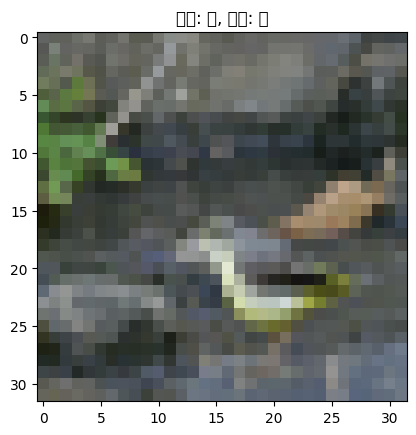

In [ ]:
# 使用模型進行預測
predictions = model.predict(x_test)

# 隨機選擇一個測試樣本進行預測
import random
random_index = random.randint(0, len(x_test) - 1)

# 獲取該樣本的預測結果
predicted_class = tf.argmax(predictions[random_index]).numpy()
actual_class = y_test[random_index][0]  # 获取实际类别

#把類別從數字轉成中文名稱
class_names = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]
predicted_class_name = class_names[predicted_class]
actual_class_name = class_names[actual_class]

# 顯示預測結果
print("預測類別:", predicted_class_name)
print("實際類別:", actual_class_name)

# 顯示圖像
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_test[random_index])
plt.title(f"預測: {predicted_class_name}, 實際: {actual_class_name}")
plt.show()

查看預測效果

In [ ]:

score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.5998 - accuracy: 0.5151


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 1.5998305082321167
正確率 0.5151000022888184


儲存model

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_dnn_model')